In [20]:
import numpy as np 
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris=datasets.load_iris()
x=iris['data'][:,(2,3)]
y=(iris['target']==2).astype(np.float64)
svm_clf=Pipeline([("scaler",StandardScaler()),("LinearSVC",LinearSVC(C=1,loss="hinge"))])
svm_clf.fit(x,y)


C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('LinearSVC', LinearSVC(C=1, loss='hinge'))])

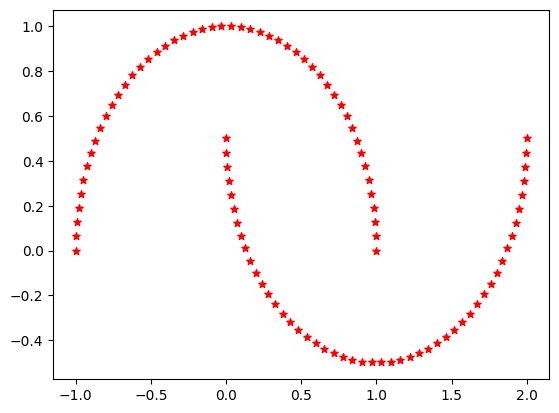

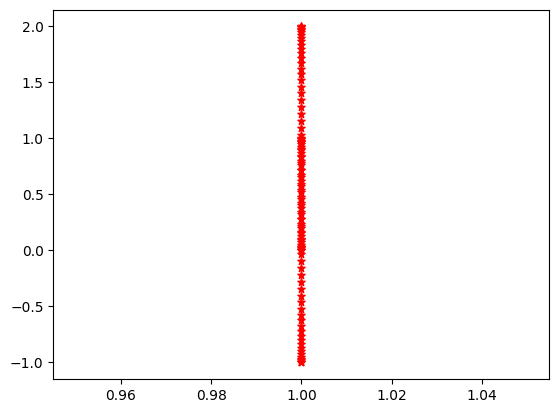

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [75]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
data=datasets.make_moons()
x=data[0]
y=data[1]
plt.scatter(x[:,0],x[:,1],c="red",s=30,marker="*")
plt.show()
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
plt.scatter(x_poly[:,0],x_poly[:,1],c="red",s=30,marker="*")
plt.show()
polynomial_svm_clf = Pipeline([
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ])
polynomial_svm_clf.fit(x, y)

In [76]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ])
poly_kernel_svm_clf.fit(x, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [81]:
from sklearn.model_selection import GridSearchCV
param_grid=[{"degree":[3,10,30],"coef0":[1,2,3,4],"C":[1,2,3,4,5]},{"degree":[3,10],"coef0":[3,4,5],"C":[2,3,6]}]
svc=SVC(kernel="poly")
grid_search=GridSearchCV(svc,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(x,y)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid=[{'C': [1, 2, 3, 4, 5], 'coef0': [1, 2, 3, 4],
                          'degree': [3, 10, 30]},
                         {'C': [2, 3, 6], 'coef0': [3, 4, 5],
                          'degree': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [83]:
grid_search.best_params_

{'C': 1, 'coef0': 1, 'degree': 3}

In [88]:
curves=grid_search.cv_results_
for mean_score,params in zip(curves['mean_test_score'],curves['params']):
    print(np.sqrt(mean_score),params)

0.0 {'C': 1, 'coef0': 1, 'degree': 3}
nan {'C': 1, 'coef0': 1, 'degree': 10}
nan {'C': 1, 'coef0': 1, 'degree': 30}
0.0 {'C': 1, 'coef0': 2, 'degree': 3}
0.0 {'C': 1, 'coef0': 2, 'degree': 10}
nan {'C': 1, 'coef0': 2, 'degree': 30}
0.0 {'C': 1, 'coef0': 3, 'degree': 3}
0.0 {'C': 1, 'coef0': 3, 'degree': 10}
nan {'C': 1, 'coef0': 3, 'degree': 30}
0.0 {'C': 1, 'coef0': 4, 'degree': 3}
0.0 {'C': 1, 'coef0': 4, 'degree': 10}
nan {'C': 1, 'coef0': 4, 'degree': 30}
0.0 {'C': 2, 'coef0': 1, 'degree': 3}
nan {'C': 2, 'coef0': 1, 'degree': 10}
nan {'C': 2, 'coef0': 1, 'degree': 30}
0.0 {'C': 2, 'coef0': 2, 'degree': 3}
0.0 {'C': 2, 'coef0': 2, 'degree': 10}
nan {'C': 2, 'coef0': 2, 'degree': 30}
0.0 {'C': 2, 'coef0': 3, 'degree': 3}
0.0 {'C': 2, 'coef0': 3, 'degree': 10}
nan {'C': 2, 'coef0': 3, 'degree': 30}
0.0 {'C': 2, 'coef0': 4, 'degree': 3}
0.0 {'C': 2, 'coef0': 4, 'degree': 10}
nan {'C': 2, 'coef0': 4, 'degree': 30}
0.0 {'C': 3, 'coef0': 1, 'degree': 3}
nan {'C': 3, 'coef0': 1, 'degree':

C:\Users\preeti\AppData\Local\Temp\ipykernel_53456\3533436555.py:3: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(mean_score),params)


In [92]:
rbf_kernel_svm_clf=Pipeline([("scaler",StandardScaler()),("svm_clf",SVC(kernel="rbf",gamma=0.5,C=0.001))])
rbf_kernel_svm_clf.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=0.5))])

In [94]:
from sklearn.svm import LinearSVR
linersvr=LinearSVR(epsilon=1.5)
linersvr.fit(x,y)

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR(epsilon=1.5)

In [98]:
from sklearn.svm import SVR
clf=SVR(kernel="poly",degree=3,C=100,epsilon=0.1)
clf.fit(x,y)

SVR(C=100, kernel='poly')